In [1]:
import os
import folium
import pickle

import json
import pandas as pd
import branca.colormap as cm
from collections import defaultdict


print(folium.__version__)


0.3.0


In [2]:

#us_states = os.path.join('..\\example\\data', 'us-states.json')
#US_Unemployment_Oct2012 = os.path.join('..\\example\\data', 'US_Unemployment_Oct2012.csv')

fr_iris = "../BIGBASE/iris_clean.json"

print("loading IRIS data")
geo_json_data = json.load(open(fr_iris))
print("loading JSON data")
with open('../BIGBASE/iris_revenu_dataviz.pickle', 'rb') as handle:
    FR_Revenue = pickle.load(handle)

FR_Revenue = FR_Revenue[["IRIS","RFPQ211"]]
print(FR_Revenue.shape)

#fr_revenue_dict = FR_Revenue.set_index('IRIS')['RFPQ211']

fr_revenue_dict = defaultdict(lambda: 1400)

for index, row in FR_Revenue.iterrows():
    fr_revenue_dict[row["IRIS"]]=row["RFPQ211"]


loading IRIS data
loading JSON data
(51899, 2)


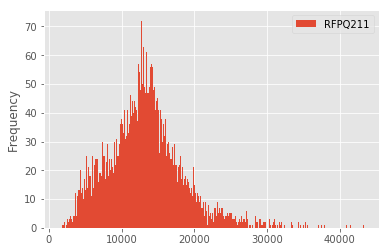

In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.figure();
myplot = FR_Revenue[["RFPQ211"]].plot.hist(bins=1000)
plt.show()

In [8]:

def my_color_function(feature):
    """Maps low values to green and hugh values to red."""
    if fr_revenue_dict[feature['properties']['DCOMIRIS']] > 22200:
        return '#ff0000'
    else:
        return '#008000'

#m = folium.Map([48.8566, 2.3522], tiles='cartodbpositron', zoom_start=2)
m = folium.Map(width=250,height=250,location=[48.8566, 2.3522], zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor':  my_color_function(feature),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)



#
# def my_color_function(feature):
#     """Maps low values to green and hugh values to red."""
#     if unemployment_dict[feature['id']] > 6.5:
#         return '#ff0000'
#     else:
#         return '#008000'
#
# m = folium.Map([43, -100], tiles='cartodbpositron', zoom_start=4)
#
# folium.GeoJson(
#     geo_json_data,
#     style_function=lambda feature: {
#         'fillColor': my_color_function(feature),
#         'color': 'black',
#         'weight': 2,
#         'dashArray': '5, 5'
#     }
# ).add_to(m)
#
# m.save(os.path.join('results', 'Colormaps_0.html'))
#
# m

In [ ]:
#m.save(os.path.join('results', 'Colormaps_2.html'))
m